Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy Score: 0.8620689655172413
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.89      0.89      0.89        19

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29



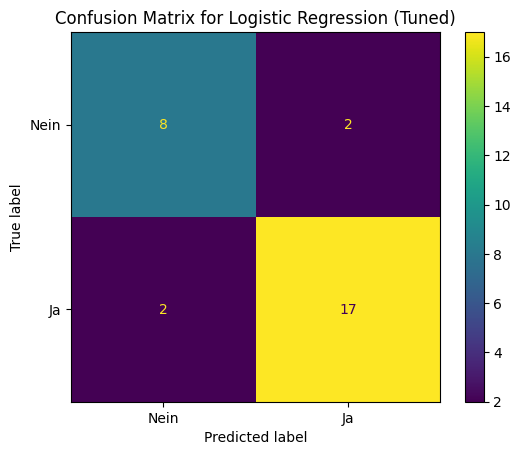

Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Accuracy Score: 0.8620689655172413
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.89      0.89      0.89        19

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29



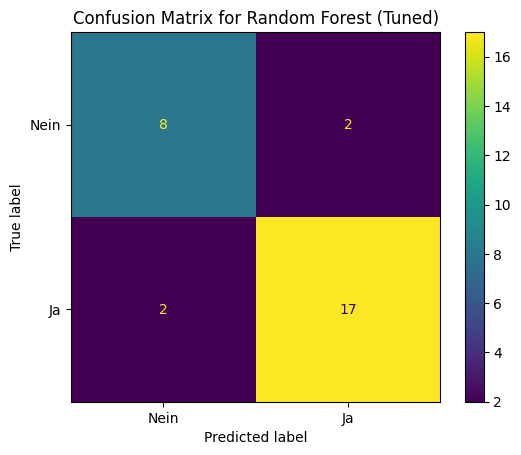

C:\Users\Herby\AppData\Local\Temp\ipykernel_49908\329136470.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')


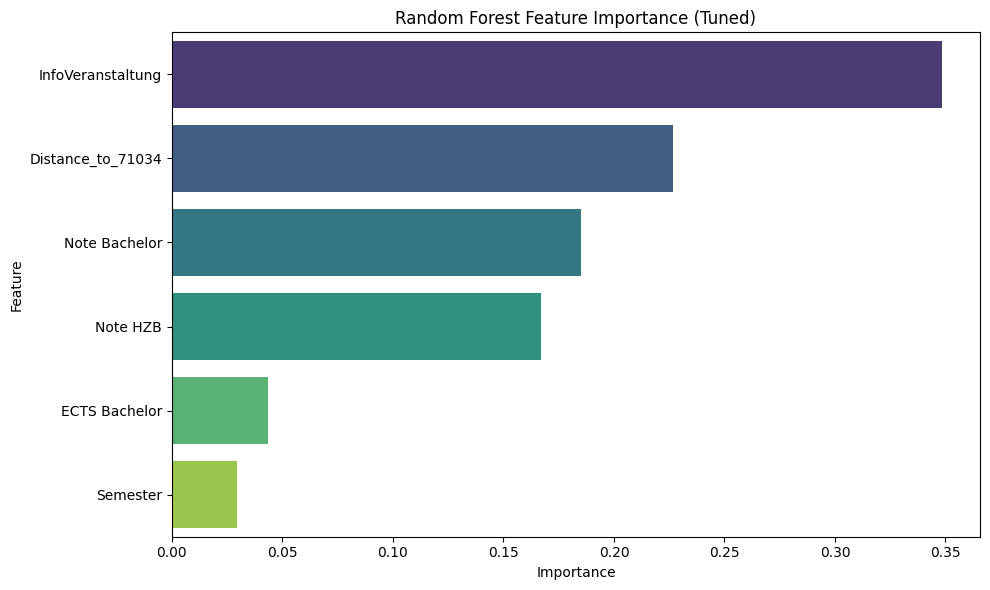

Voting Classifier Accuracy Score: 0.8620689655172413
Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.89      0.89      0.89        19

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29



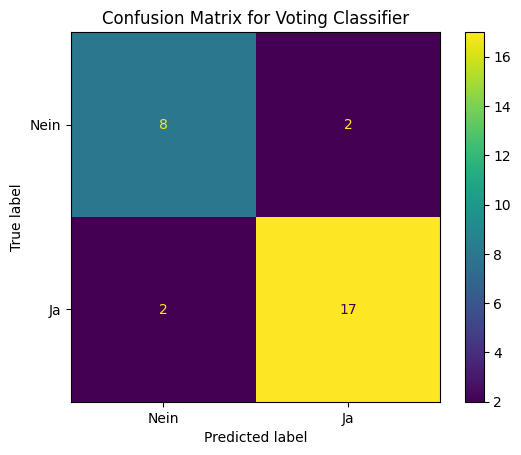

C:\Users\Herby\AppData\Local\Temp\ipykernel_49908\329136470.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


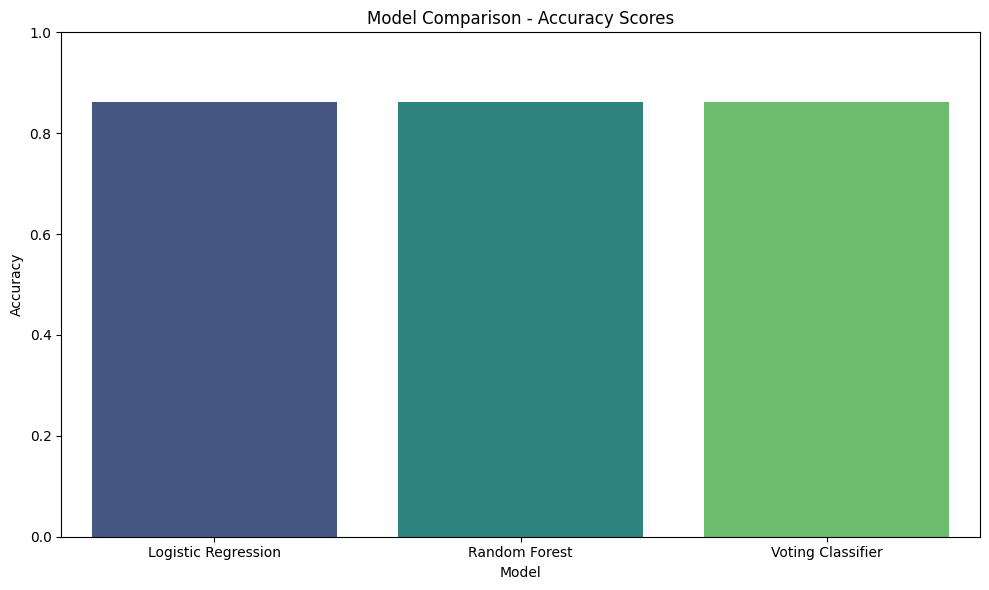

C:\Users\Herby\AppData\Local\Temp\ipykernel_49908\329136470.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precisions, palette='magma')


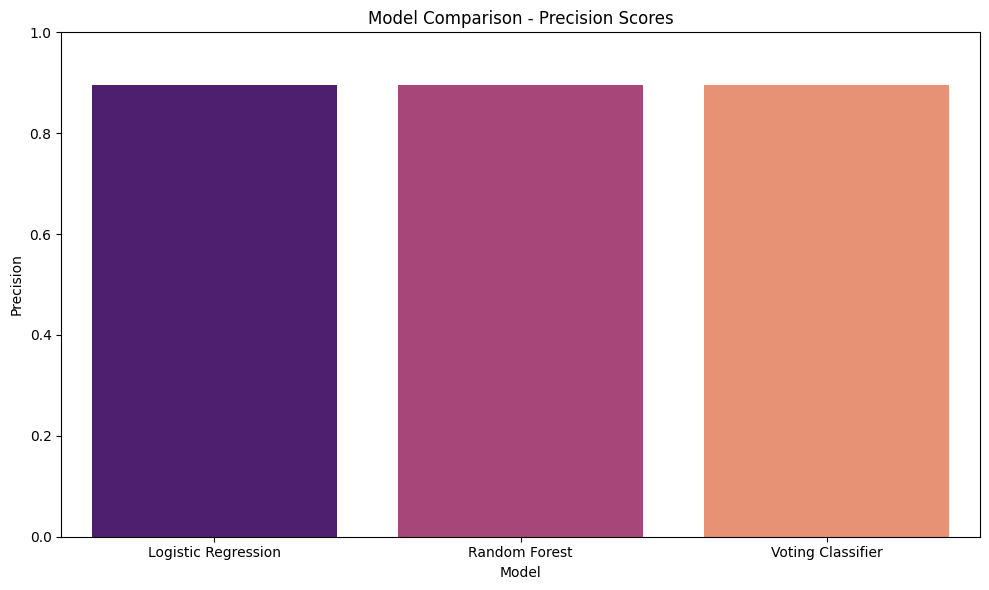

C:\Users\Herby\AppData\Local\Temp\ipykernel_49908\329136470.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=recalls, palette='inferno')


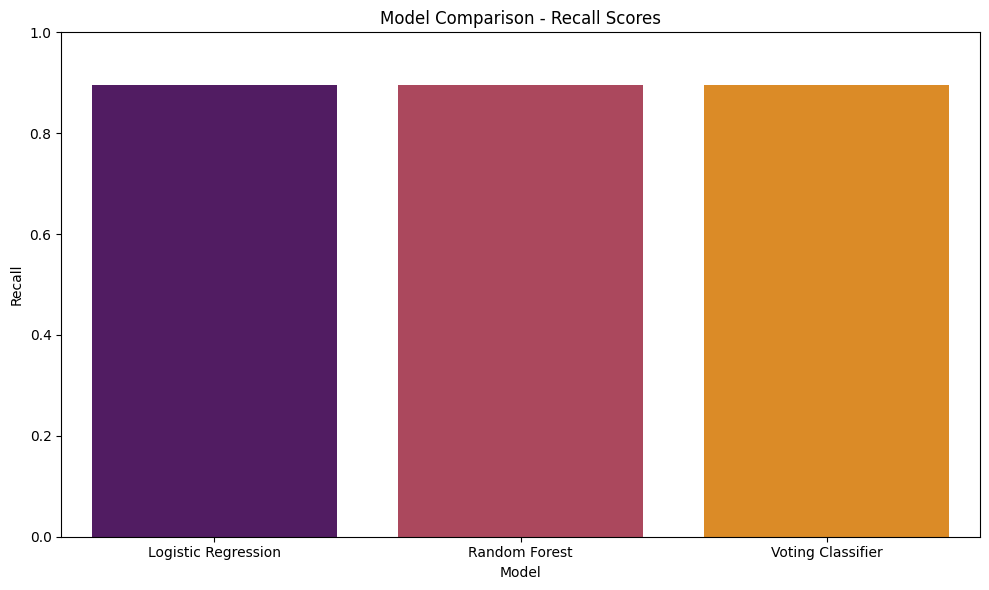

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data_with_distances.xlsx'  # Make sure to have the correct path
updated_data = pd.read_excel(file_path)

# Prepare the data for machine learning model
# Define the features (independent variables) and the target variable (Immatrikulation)
features = updated_data[['Semester', 'InfoVeranstaltung', 'Note HZB', 'Note Bachelor', 'ECTS Bachelor', 'Distance_to_71034']]

# Convert categorical features into numerical ones
features = features.copy()  # Avoid SettingWithCopyWarning
features.loc[:, 'InfoVeranstaltung'] = features['InfoVeranstaltung'].map({'ja': 1, 'nein': 0})

# Define the target variable (Immatrikulation)
target = updated_data['Immatrikulation'].map({'Ja': 1, 'Nein': 0})

# Handle missing values by filling them with the mean value of each column
features_filled = features.apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(features.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_filled, target, test_size=0.3, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Logistic Regression with GridSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # solvers that support l1 and l2 penalties
}

log_reg = LogisticRegression()
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters for Logistic Regression
best_lr_model = grid_search_lr.best_estimator_
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

# Make predictions and evaluate the model
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Evaluate the model's performance
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy Score:", lr_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Create and visualize the confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(conf_matrix_lr, display_labels=['Nein', 'Ja']).plot(cmap='viridis')
plt.title('Confusion Matrix for Logistic Regression (Tuned)')
plt.show()

# Hyperparameter tuning for Random Forest with GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
best_rf_model = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Make predictions and evaluate the Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model's performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
print("Random Forest Accuracy Score:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Create and visualize the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=['Nein', 'Ja']).plot(cmap='viridis')
plt.title('Confusion Matrix for Random Forest (Tuned)')
plt.show()

# Extract feature importance from the Random Forest model
feature_importance_rf = pd.DataFrame({
    'Feature': features_filled.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance from Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.title('Random Forest Feature Importance (Tuned)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Combine Logistic Regression and Random Forest using Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', best_lr_model), ('rf', best_rf_model)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the Voting Classifier model
y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluate the Voting Classifier's performance
voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_precision = precision_score(y_test, y_pred_voting)
voting_recall = recall_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy Score:", voting_accuracy)
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

# Create and visualize the confusion matrix for Voting Classifier
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
ConfusionMatrixDisplay(conf_matrix_voting, display_labels=['Nein', 'Ja']).plot(cmap='viridis')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# Visualize model comparison
models = ['Logistic Regression', 'Random Forest', 'Voting Classifier']
accuracies = [lr_accuracy, rf_accuracy, voting_accuracy]
precisions = [lr_precision, rf_precision, voting_precision]
recalls = [lr_recall, rf_recall, voting_recall]

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot Precision Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=precisions, palette='magma')
plt.title('Model Comparison - Precision Scores')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot Recall Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=recalls, palette='inferno')
plt.title('Model Comparison - Recall Scores')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()